# KMeans clustering using *scikit-learn*

In [7]:
from os.path import join as pjoin
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster
from skimage import io
from glob import glob
%matplotlib inline

In [20]:
# Collection of RGB images, one image per pol 03ppol<0:angle:90>_ORG.tif
!ls -lhR ~/datasets/LM_Multipol_Images/

datasets/LM_Multipol_Images/:
total 92K
drwxr-xr-x 1 M6JCORRE 1049089   0 Dec  7 10:00 03_0
drwxr-xr-x 1 M6JCORRE 1049089   0 Dec  7 10:01 03_1
-rw-r--r-- 1 M6JCORRE 1049089 75K Dec  7 10:41 03ppol001_ORG_thumb.jpg
drwxr-xr-x 1 M6JCORRE 1049089   0 Dec  7 10:03 06_0
drwxr-xr-x 1 M6JCORRE 1049089   0 Dec  7 10:05 06_1

datasets/LM_Multipol_Images/03_0:
total 132M
-rw-r--r-- 1 M6JCORRE 1049089 18M Oct 22 19:10 03ppol001_ORG.tif
-rw-r--r-- 1 M6JCORRE 1049089 17M Oct 22 19:11 03xpol00_ORG.tif
-rw-r--r-- 1 M6JCORRE 1049089 17M Oct 23 09:12 03xpol15_ORG.tif
-rw-r--r-- 1 M6JCORRE 1049089 17M Oct 23 09:12 03xpol30_ORG.tif
-rw-r--r-- 1 M6JCORRE 1049089 17M Oct 23 09:12 03xpol45_ORG.tif
-rw-r--r-- 1 M6JCORRE 1049089 17M Oct 23 09:13 03xpol60_ORG.tif
-rw-r--r-- 1 M6JCORRE 1049089 17M Oct 23 09:13 03xpol75_ORG.tif
-rw-r--r-- 1 M6JCORRE 1049089 16M Oct 23 09:13 03xpol90_ORG.tif

datasets/LM_Multipol_Images/03_1:
total 130M
-rw-r--r-- 1 M6JCORRE 1049089 18M Oct 23 10:49 031ppol00_ORG.tif
-rw-r--r-- 

In [21]:
# Example based on dataset 03_0, one image per pol 03ppol<0:angle:90>_ORG.tif
imgs_path = '/home/jovyan/datasets/LM_Multipol_Images/03_0/'

In [22]:
img_fnames = glob(pjoin(imgs_path,'*.tif'))
img_fnames

['datasets/LM_Multipol_Images/03_0\\03ppol001_ORG.tif',
 'datasets/LM_Multipol_Images/03_0\\03xpol00_ORG.tif',
 'datasets/LM_Multipol_Images/03_0\\03xpol15_ORG.tif',
 'datasets/LM_Multipol_Images/03_0\\03xpol30_ORG.tif',
 'datasets/LM_Multipol_Images/03_0\\03xpol45_ORG.tif',
 'datasets/LM_Multipol_Images/03_0\\03xpol60_ORG.tif',
 'datasets/LM_Multipol_Images/03_0\\03xpol75_ORG.tif',
 'datasets/LM_Multipol_Images/03_0\\03xpol90_ORG.tif']

In [23]:
img_fname = '/home/jovyan/datasets/LM_Multipol_Images/03_0/03ppol001_ORG.tif'
img = io.imread(img_fname)

In [24]:
dim_x, dim_y, dim_c = img.shape
print("Width %s, Height %s, Colors %s" % (dim_y, dim_x, dim_c))

Width 2560, Height 1920, Colors 3


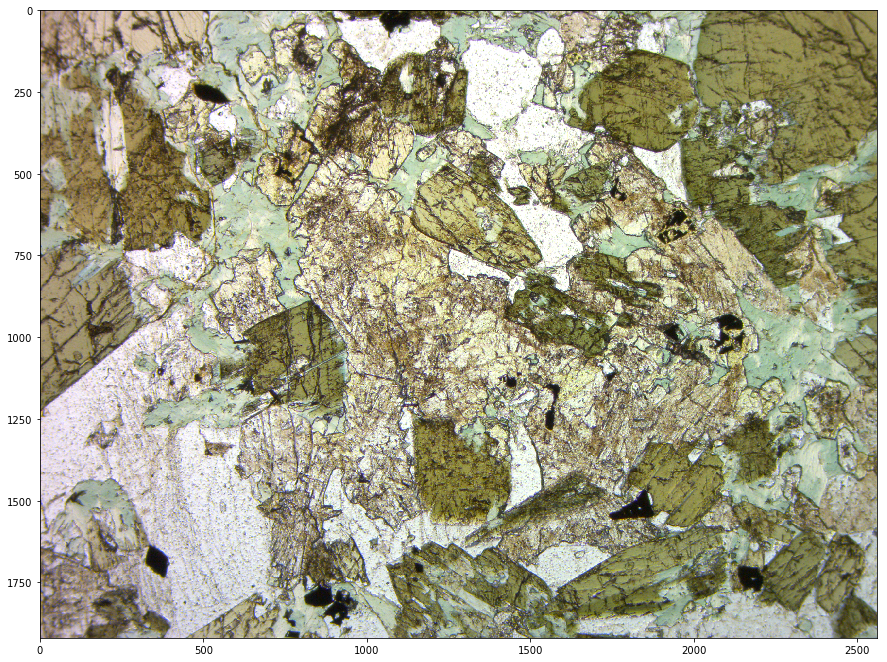

In [25]:
plt.figure(figsize=(15,15)) ; plt.imshow(img)

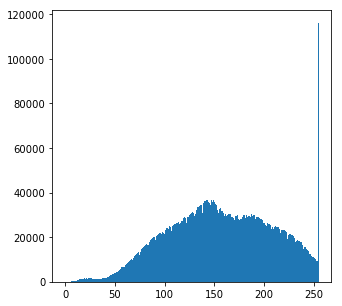

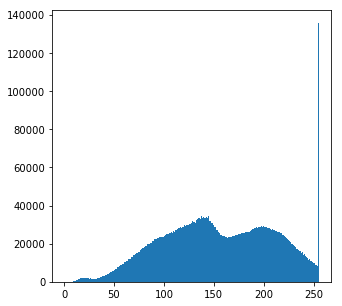

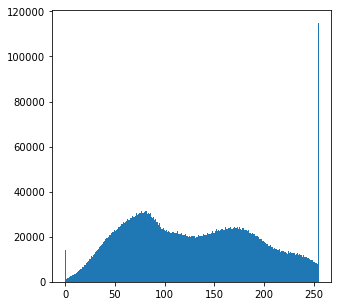

In [26]:
# Hist per channel channel
plt.figure(figsize=(5,5)) ; plt.hist(img[:,:,0].reshape(-1), bins=255);
plt.figure(figsize=(5,5)) ; plt.hist(img[:,:,1].reshape(-1), bins=255);
plt.figure(figsize=(5,5)) ; plt.hist(img[:,:,2].reshape(-1), bins=255);

In [34]:
km_clf = cluster.KMeans(n_clusters=10, n_jobs=1, tol=1e-2, max_iter=100)

In [35]:
# Working with pixel values as feature set
X = img.reshape([dim_x*dim_y, dim_c])

In [36]:
km_clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.01, verbose=0)

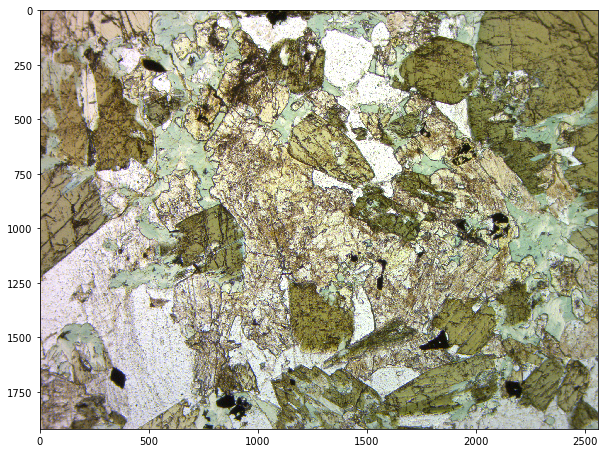

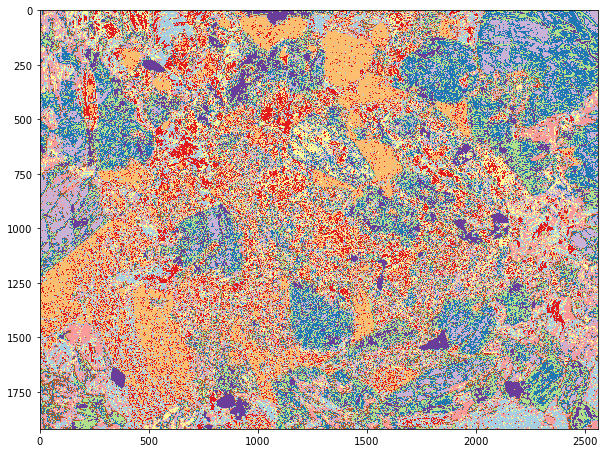

In [123]:
plt.figure(figsize=(10,10)) ; plt.imshow(img)
plt.figure(figsize=(10,10)) ; plt.imshow(km_clf.labels_.reshape([dim_x, dim_y]), cmap='Paired');

In [120]:
img_seg = km_clf.labels_.reshape([dim_x, dim_y]) # Segmented image

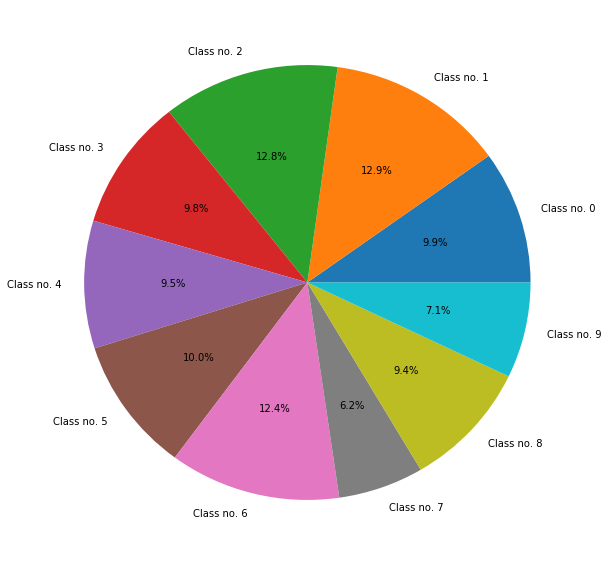

In [207]:
# Pixel count per class
px_count = dim_x*dim_y
labels = ["Class no. %s" % i for i in range(10)]
pie_x = []
for label in range(10):
    pie_x.append(np.sum(img_seg==label) / px_count)
    
plt.figure(figsize=(10,10)); plt.pie(pie_x, labels=labels, autopct='%1.1f%%');

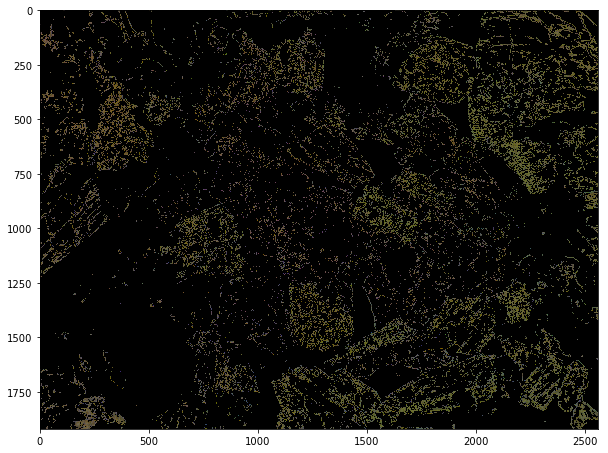

In [208]:
# Visualize segmentation for class with higher px count (cl_num = 2)
cl_num = 2
seg_per_class = np.zeros_like(img)
for i in range(3): 
    seg_per_class[:,:,i] = (img_seg==cl_num)*img[:,:,i]
plt.figure(figsize=(10,10)) ; plt.imshow(seg_per_class);